In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

/Users/lsafari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
v = np.linspace(0,2*np.pi,21)
N = np.random.normal( loc = 0, scale = 0.20, size = (2000,21) )
base_sin = np.sin(v)
base_cos = np.cos(v)

In [4]:
X_sin = base_sin + N[0:1000,:]
X_cos = base_cos + N[1000:2000,:]
print(X_sin.shape)

(1000, 21)


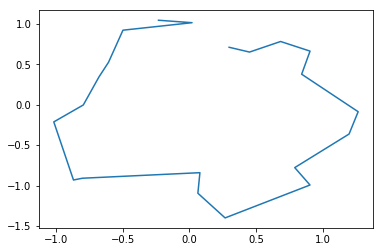

In [8]:
i = 999
plt.plot(X_sin[i,:], X_cos[i,:])

In [11]:
X_noise = np.random.normal(loc=0, scale = 0.75, size = (20000,21))

In [12]:
X_sin[0,:]

array([ 0.13574436,  0.29134401,  0.58104583,  0.74497495,  0.92846174,
        0.8874601 ,  0.99278235,  1.02725762,  0.55000374,  0.20768224,
        0.22107257, -0.04922761, -0.75706164, -0.80815815, -0.68354595,
       -1.05065481, -0.78832396, -0.8884251 , -0.80464934, -0.27078296,
       -0.01374458])

In [13]:
X = []
y = []

for i in range(1000):
    X.append((np.stack([X_sin[i,:],X_cos[i,:]], axis = 0).T).reshape(1,21,2))
    y.append(1)

for i in range(10000):
    X.append((np.stack([X_noise[i,:],X_noise[i+10000,:]], axis = 0).T).reshape(1,21,2))
    y.append(0)    

(11000, 21, 2) (21, 2) (21,)
(11000,)


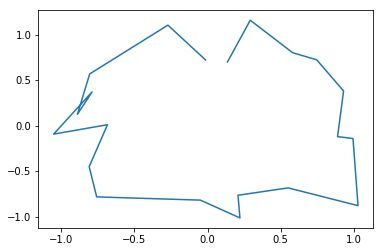

In [14]:
X = np.zeros((11000,21,2))
y = np.zeros(11000)


for i in range(1000):
    X[i] = np.stack([X_sin[i,:],X_cos[i,:]], axis = 0).T
    y[i] = 1

for i in range(10000):
    X[i+1000] = np.stack([X_noise[i,:],X_noise[i+10000,:]], axis = 0).T

print(X.shape, X[0].shape, X[0,:,0].shape)
plt.plot(X[0,:,0],X[0,:,1])

print(y.shape)

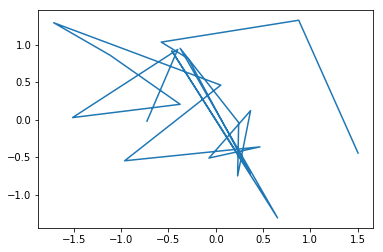

In [15]:
i = 1400
plt.plot(X[i,:,0], X[i,:,1])

In [16]:
model = models.Sequential()
model.add(layers.LSTM(21, input_shape=(21,2)))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 21)                2016      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 22        
Total params: 2,038
Trainable params: 2,038
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X,y, epochs=3, batch_size = 32)

Epoch 1/3
11000/11000 [==============================] - 6s 560us/step - loss: 0.1667 - acc: 0.9557
Epoch 2/3
11000/11000 [==============================] - 6s 532us/step - loss: 0.0047 - acc: 1.0000
Epoch 3/3
11000/11000 [==============================] - 6s 524us/step - loss: 0.0028 - acc: 0.9995


In [18]:
for i in range(980,1020):
    print(model.predict(X[i].reshape(1,21,2)))

[[0.9930633]]
[[0.9926005]]
[[0.99240375]]
[[0.9914555]]
[[0.99225086]]
[[0.99254864]]
[[0.9926658]]
[[0.99123853]]
[[0.99236333]]
[[0.99275464]]
[[0.9922557]]
[[0.9914813]]
[[0.9916788]]
[[0.9921715]]
[[0.99288154]]
[[0.9930795]]
[[0.9923373]]
[[0.9916435]]
[[0.9927931]]
[[0.99283594]]
[[0.00023085]]
[[0.00023512]]
[[0.00032625]]
[[0.00024429]]
[[0.00027293]]
[[0.00022864]]
[[0.00028711]]
[[0.00025141]]
[[0.00025314]]
[[0.00197245]]
[[0.00029261]]
[[0.00024374]]
[[0.00025844]]
[[0.00025156]]
[[0.00025245]]
[[0.00024345]]
[[0.000228]]
[[0.0002401]]
[[0.00030084]]
[[0.00024325]]
